In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
users = pd.read_csv('users.csv')
recipes = pd.read_csv('recipes.csv')
recommendations = pd.read_csv('recommendations.csv')

# Preview data
users.head()

,user_id,age,diet_type,preferred_cuisine,allergies,past_orders,feedback_score
0,1,32,balanced,Mexican,dairy,19,3.7
1,2,32,keto,Mexican,gluten,14,4.5
2,3,21,vegetarian,Italian,dairy,11,3.2
3,4,36,balanced,Indian,gluten,19,3.5
4,5,50,vegetarian,Italian,nuts,20,4.0


In [3]:
ctr = recommendations['clicked'].sum() / len(recommendations)
print(f'Click-Through Rate (CTR): {ctr:.2%}')

Click-Through Rate (CTR): 61.33%


In [4]:
clicked_recs = recommendations[recommendations['clicked'] == 1]
precision = clicked_recs['liked'].sum() / len(clicked_recs)
print(f'Precision: {precision:.2%}')

Precision: 67.93%


In [5]:
recall = recommendations['liked'].sum() / len(recommendations)
print(f'Approximate Recall: {recall:.2%}')

Approximate Recall: 41.67%


In [6]:
feedback_summary = users['feedback_score'].describe()
print('User Feedback Score Summary:')
print(feedback_summary)

User Feedback Score Summary:
count    100.000000
mean       4.000000
std        0.513259
min        3.000000
25%        3.700000
50%        4.000000
75%        4.400000
max        5.000000
Name: feedback_score, dtype: float64


In [7]:
top_recipes = recommendations[recommendations['liked'] == 1]['recipe_id'].value_counts().head(5)
print('Top Liked Recipes:')
print(top_recipes)

top_users = recommendations[recommendations['clicked'] == 1]['user_id'].value_counts().head(5)
print('\nMost Engaged Users:')
print(top_users)

Top Liked Recipes:
recipe_id
107    8
116    7
126    7
110    6
130    5
Name: count, dtype: int64

Most Engaged Users:
user_id
45    6
70    5
12    5
25    5
61    4
Name: count, dtype: int64


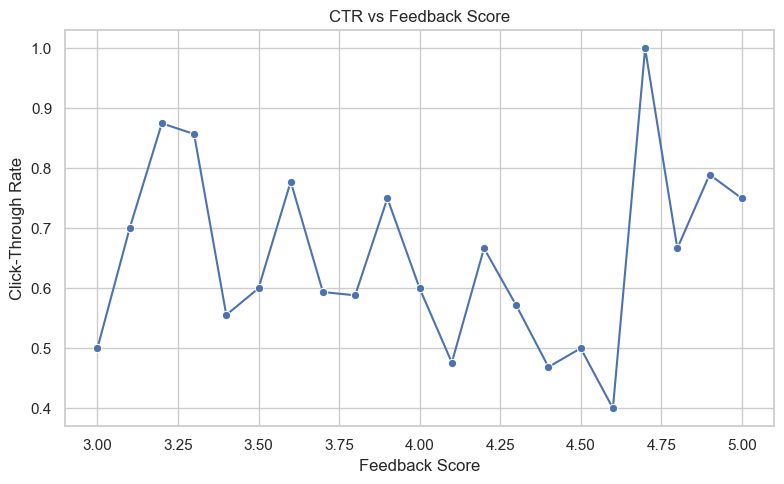

In [8]:
merged = recommendations.merge(users, on='user_id')
feedback_ctr = merged.groupby('feedback_score')['clicked'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=feedback_ctr, x='feedback_score', y='clicked', marker='o')
plt.title('CTR vs Feedback Score')
plt.xlabel('Feedback Score')
plt.ylabel('Click-Through Rate')
plt.tight_layout()
plt.show()